<a href="https://colab.research.google.com/github/Aritra153/Autonomous-Object-Path-Planner/blob/main/Presentation_2_for_Gridworld_using_Q_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [ ]:
rows=4
columns=4
reward_matrix=np.zeros((rows,columns))-1

block_location=[2,1]
goal_location=[3,3]
reward_matrix[block_location[0]][block_location[1]]=-80
reward_matrix[goal_location[0]][goal_location[1]]=500
actions=['UP','DOWN','LEFT','RIGHT']
act_dict={'UP':0,'DOWN':1,'LEFT':2,'RIGHT':3}
def show_position(current_location):
  pos_matrix=np.zeros((rows,columns))
  pos_matrix[current_location[0]][current_location[1]]=1
  print(pos_matrix)
def get_reward(new_location):
  a=reward_matrix[new_location[0]][new_location[1]]
  return a
def take_step(action,current_location):
  reward=-1000
  last_location=current_location
  if(action=='UP'): #TOP ACTION
    if(last_location[0]==0):
      reward=reward_matrix[last_location[0]][last_location[1]]
    else:
      current_location[0]=(current_location[0]-1)
      current_location[1]=current_location[1]
      reward=reward_matrix[current_location[0]][current_location[1]]
  if(action=='DOWN'): #DOWN ACTION
    if(last_location[0]==(rows-1)):
      reward=reward_matrix[last_location[0]][last_location[1]]
    else:
      current_location[0]=current_location[0]+1
      current_location[1]=current_location[1]
      reward=reward_matrix[current_location[0]][current_location[1]]
  if(action=='LEFT'): #LEFT ACTION
    if(last_location[1]==0):
      reward=reward_matrix[last_location[0]][last_location[1]]
    else:
      current_location[0]=current_location[0]
      current_location[1]=current_location[1]-1
      reward=reward_matrix[current_location[0]][current_location[1]]
  if(action=='RIGHT'):  #RIGHT ACTION
    if(last_location[1]==columns-1):
      reward=reward_matrix[last_location[0]][last_location[1]]
    else:
      current_location[0]=current_location[0]
      current_location[1]=current_location[1]+1
      reward=reward_matrix[current_location[0]][current_location[1]]

  return reward



In [ ]:
epsilon=0.6
alpha=0.1
gamma=0.9
action_numbers={0:'UP',1:'DOWN',2:'LEFT',3:'RIGHT'}
action_matrix=np.zeros(((rows*columns),4))
action_matrix[0][0]=-50000000
action_matrix[0][2]=-40000000
action_matrix[1][0]=-50000000
action_matrix[2][0]=-50000000
action_matrix[3][0]=-50000000
action_matrix[3][3]=-40000000
action_matrix[4][2]=-50000000
action_matrix[7][3]=-50000000
action_matrix[8][2]=-50000000
action_matrix[11][3]=-50000000
action_matrix[12][1]=-50000000
action_matrix[12][2]=-40000000
action_matrix[13][1]=-50000000
action_matrix[14][1]=-50000000
action_matrix[15][1]=-50000000
action_matrix[15][3]=-40000000
container1={(0,0):0,(0,1):1,(0,2):2,(0,3):3,(1,0):4,(1,1):5,(1,2):6,(1,3):7,(2,0):8,(2,1):9,(2,2):10,(2,3):11,(3,0):12,(3,1):13,(3,2):14,(3,3):15}
period_list=[]




def choose_action(current_location):
  if(np.random.uniform(0,1))<epsilon:
    if(current_location==[0,0]):
      actions1=['DOWN','RIGHT']
      take_action=actions1[np.random.randint(0,len(actions1))]
    if(current_location==[0,1]):
      actions2=['DOWN','LEFT','RIGHT']
      take_action=actions2[np.random.randint(0,len(actions2))]
    if(current_location==[0,2]):
      actions3=['DOWN','LEFT','RIGHT']
      take_action=actions3[np.random.randint(0,len(actions3))]
    if(current_location==[0,3]):
      actions4=['DOWN','LEFT']
      take_action=actions4[np.random.randint(0,len(actions4))]
    if(current_location==[1,0]):
      actions5=['UP','DOWN','RIGHT']
      take_action=actions5[np.random.randint(0,len(actions5))]
    if(current_location==[1,3]):
      actions6=['UP','DOWN','LEFT']
      take_action=actions6[np.random.randint(0,len(actions6))]
    if(current_location==[2,0]):
      actions7=['UP','DOWN','RIGHT']
      take_action=actions7[np.random.randint(0,len(actions7))]
    if(current_location==[2,3]):
      actions8=['UP','DOWN','LEFT']
      take_action=actions8[np.random.randint(0,len(actions8))]
    if(current_location==[3,0]):
      actions9=['UP','RIGHT']
      take_action=actions9[np.random.randint(0,len(actions9))]
    if(current_location==[3,1]):
      actions10=['UP','LEFT','RIGHT']
      take_action=actions10[np.random.randint(0,len(actions10))]
    if(current_location==[3,2]):
      actions11=['UP','LEFT','RIGHT']
      take_action=actions11[np.random.randint(0,len(actions11))]
    else:
      take_action=actions[np.random.randint(0,len(actions))]
    return take_action
  else:
    action_values_of_state=action_matrix[container1[(current_location[0],current_location[1])]]
    max_val=max(action_values_of_state)
    tie_breaker=[]

    for i in range (len(action_values_of_state)):
      if action_values_of_state[i]==max_val:
        tie_breaker.append(action_numbers[i])
    current_action_value=np.random.choice(tie_breaker)

    return current_action_value

def learn(old_state,new_state,acti):

  reward=get_reward(new_state)

  if((new_state[0]==goal_location[0])and(new_state[1]==goal_location[1])):
    action_matrix[container1[(old_state[0],old_state[1])]][act_dict[acti]]=action_matrix[container1[(old_state[0],old_state[1])]][act_dict[acti]]+alpha*(500-action_matrix[container1[(old_state[0],old_state[1])]][act_dict[acti]])
  action_matrix[container1[(old_state[0],old_state[1])]][act_dict[acti]]=action_matrix[container1[(old_state[0],old_state[1])]][act_dict[acti]]+alpha*(reward+gamma*(action_matrix[container1[(new_state[0],new_state[1])]][(act_dict[choose_action(new_state)])])-action_matrix[container1[(old_state[0],old_state[1])]][act_dict[acti]])








In [ ]:
current_location=[0,0]
c=0
action_list=[]
action_dictionary={}
show_position(current_location)
while(current_location!=goal_location):

  c=c+1
  ac=choose_action(current_location)
  print("TAKEN ACTION : ",ac)
  action_list.append(ac)
  prev_location=current_location
  take_step(ac,current_location)
  learn(prev_location,current_location,ac)


  show_position(current_location)
period_list.append(c)
action_dictionary["action_set 1"]=action_list
print("No of steps taken : ",c)





[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 

In [ ]:
action_matrix


array([[-4.05000002e+07,  0.00000000e+00, -3.20760003e+07,
         0.00000000e+00],
       [-4.95000001e+07,  0.00000000e+00,  0.00000000e+00,
        -2.71000000e-01],
       [-4.05000002e+07,  0.00000000e+00, -3.64500048e+06,
         0.00000000e+00],
       [-1.93710251e+07,  0.00000000e+00,  0.00000000e+00,
        -1.86840592e+07],
       [-1.00000000e-01,  0.00000000e+00, -3.28050003e+07,
         0.00000000e+00],
       [-2.07910000e-01, -2.71000000e-01, -1.00000000e-01,
        -1.99000000e-01],
       [-1.00000000e-01,  0.00000000e+00, -2.71000000e-01,
        -1.90000000e-01],
       [ 0.00000000e+00, -3.64500053e+06,  0.00000000e+00,
        -4.05000002e+07],
       [ 0.00000000e+00, -1.90000000e-01, -5.00000000e+07,
         0.00000000e+00],
       [ 0.00000000e+00, -8.00000000e+00, -8.00000000e+00,
        -8.00000000e+00],
       [-2.05390000e-01, -1.90000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

In [ ]:
current_location=[0,0]
c1=0
show_position(current_location)
action_list1=[]

while(current_location!=goal_location):

  c1=c1+1
  ac1=choose_action(current_location)
  print("TAKEN ACTION : ",ac1)
  action_list1.append(ac1)
  prev_location=current_location
  take_step(ac1,current_location)
  learn(prev_location,current_location,ac1)
  show_position(current_location)

period_list.append(c1)
action_dictionary["action set 2"]=action_list1
print("No of steps taken= ",c1)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 

In [ ]:
action_matrix

array([[-3.64500003e+07,  0.00000000e+00, -2.59815604e+07,
         0.00000000e+00],
       [-4.00950003e+07,  0.00000000e+00,  0.00000000e+00,
        -4.09510000e-01],
       [-4.05000002e+07,  0.00000000e+00, -3.64500048e+06,
         0.00000000e+00],
       [-1.93710251e+07,  0.00000000e+00,  0.00000000e+00,
        -1.86840592e+07],
       [-1.00000000e-01, -1.00000000e-01, -2.15233611e+07,
         0.00000000e+00],
       [-3.75507100e-01, -5.05414900e-01, -1.00000000e-01,
        -1.99000000e-01],
       [-1.00000000e-01,  0.00000000e+00, -2.71000000e-01,
        -1.90000000e-01],
       [ 0.00000000e+00, -3.64500053e+06,  0.00000000e+00,
        -4.05000002e+07],
       [-1.00000000e-01, -3.59290000e-01, -5.00000000e+07,
         0.00000000e+00],
       [ 0.00000000e+00, -1.52000000e+01, -8.00000000e+00,
        -2.37608000e+01],
       [-2.05390000e-01, -1.90000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

In [ ]:
current_location=[0,0]
c2=0
show_position(current_location)
action_list3=[]
while(current_location!=goal_location):
  c2=c2+1
  ac2=choose_action(current_location)
  print("TAKEN ACTION : ",ac2)
  action_list3.append(ac2)
  prev_location=current_location
  take_step(ac2,current_location)
  learn(prev_location,current_location,ac2)
  show_position(current_location)

period_list.append(c2)
action_dictionary["action_set 3"]=action_list3
print("No of steps taken= ",c2)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0.

In [ ]:
action_matrix

array([[-3.51433408e+07,  0.00000000e+00, -2.33834045e+07,
         0.00000000e+00],
       [-3.60855003e+07,  0.00000000e+00,  0.00000000e+00,
        -5.21703100e-01],
       [-4.05000002e+07,  0.00000000e+00, -3.64500048e+06,
        -3.28050143e+05],
       [-1.93710251e+07,  0.00000000e+00,  0.00000000e+00,
        -1.86840592e+07],
       [-1.00000000e-01, -1.90000000e-01, -2.15233611e+07,
         0.00000000e+00],
       [-4.71752029e-01, -5.05414900e-01, -3.05029000e-01,
        -1.99000000e-01],
       [-2.07100000e-01, -1.00000000e-01, -2.71000000e-01,
        -3.61000000e-01],
       [ 0.00000000e+00, -3.64500053e+06,  0.00000000e+00,
        -4.05000002e+07],
       [-1.00000000e-01, -3.59290000e-01, -5.00000000e+07,
         0.00000000e+00],
       [ 0.00000000e+00, -2.16800000e+01, -8.00000000e+00,
        -2.37608000e+01],
       [-2.05390000e-01, -3.68290000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

In [ ]:
current_location=[0,0]
c3=0
show_position(current_location)
action_list4=[]
while(current_location!=goal_location):
  c3=c3+1
  ac3=choose_action(current_location)
  print("TAKEN ACTION : ",ac3)
  action_list4.append(ac3)
  prev_location=current_location
  take_step(ac3,current_location)
  learn(prev_location,current_location,ac3)
  show_position(current_location)

period_list.append(c3)
action_dictionary["action_set 4"]=action_list4
print("No of steps taken= ",c3)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]


In [ ]:
action_matrix

array([[-2.02107978e+07,  0.00000000e+00, -1.88769062e+07,
         0.00000000e+00],
       [-2.13081275e+07,  0.00000000e+00, -1.90000000e-01,
        -2.60432737e+06],
       [-2.39626752e+07,  0.00000000e+00, -3.64500048e+06,
        -2.95245229e+05],
       [-1.93710251e+07,  0.00000000e+00,  0.00000000e+00,
        -1.68156534e+07],
       [-1.00000000e-01, -3.72514328e+06, -2.09897848e+06,
         0.00000000e+00],
       [-1.15930583e+00, -8.86320520e-01, -4.97958923e-01,
        -1.40953148e+00],
       [-6.24476654e-01, -1.99000000e-01, -6.31125280e-01,
        -7.14673856e-01],
       [-1.00000000e-01, -3.28050058e+06,  0.00000000e+00,
        -3.53673991e+07],
       [-1.91773212e+06, -6.03203186e-01, -1.25822368e+07,
         0.00000000e+00],
       [-1.43280406e+02, -7.14256488e+01, -1.25046814e+02,
        -1.16614031e+02],
       [-8.42592392e-01, -8.12662216e-01, -1.00000000e-01,
        -9.12929541e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

In [ ]:
current_location=[0,0]
c4=0
show_position(current_location)
action_list5=[]
while(current_location!=goal_location):
  c4=c4+1
  ac4=choose_action(current_location)
  print("TAKEN ACTION : ",ac4)
  action_list5.append(ac4)
  prev_location=current_location
  take_step(ac4,current_location)
  learn(prev_location,current_location,ac4)
  show_position(current_location)
period_list.append(c4)
action_dictionary["action_set 5"]=action_list5
print("No of steps taken= ",c4)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]

In [ ]:
action_matrix

array([[-2.02107978e+07,  0.00000000e+00, -1.69892157e+07,
         0.00000000e+00],
       [-2.13081275e+07,  0.00000000e+00, -1.90000000e-01,
        -4.02723684e+06],
       [-2.39626752e+07,  0.00000000e+00, -3.64500048e+06,
        -2.65720806e+05],
       [-1.93710251e+07,  0.00000000e+00,  0.00000000e+00,
        -1.68156534e+07],
       [-1.90000000e-01, -3.72514328e+06, -1.53015559e+06,
         0.00000000e+00],
       [-1.18819155e+00, -8.86320520e-01, -4.97958923e-01,
        -1.47551557e+00],
       [-6.92260104e-01, -3.35901275e-01, -6.31125280e-01,
        -8.07527117e-01],
       [-1.00000000e-01, -3.28050058e+06,  0.00000000e+00,
        -3.53673991e+07],
       [-1.91773212e+06, -1.72596533e+05, -1.12107732e+07,
         0.00000000e+00],
       [-1.48146562e+02, -7.14256488e+01, -1.41936235e+02,
        -1.26370280e+02],
       [-9.79381962e-01, -9.72403321e-01, -2.75191564e-01,
        -9.46572928e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

In [ ]:
for k in range(100):
  current_location=[0,0]
  c5=0
  action_list6=[]

  while(current_location!=goal_location):
    c5=c5+1
    ac5=choose_action(current_location)


    prev_location=current_location
    take_step(ac5,current_location)
    action_list6.append(ac5)
    learn(prev_location,current_location,ac5)


  period_list.append(c5)
  action_dictionary["action_set "+str(k+6)]=action_list6


In [ ]:
period_list[100]

293

In [ ]:
min_step=min(period_list)
min_step

6

In [ ]:
tie_period_list=[]
for i in range (len(period_list)):
  if period_list[i]==min_step:
    tie_period_list.append(i+1)
tie_period_list


[8]

In [ ]:
period_list[7]

6

Text(0, 0.5, 'No.of Steps')

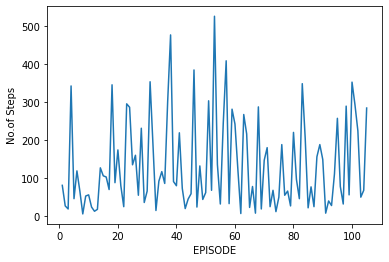

In [ ]:
step_count=[]
for i in range (len(period_list)):
  step_count.append(i+1)
plt.plot(step_count,period_list)
plt.xlabel("EPISODE")
plt.ylabel("No.of Steps")


In [ ]:
action_dictionary["action_set 8"]

['DOWN', 'RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT']

In [ ]:
list_action=action_dictionary["action_set 8"]
current_location=[0,0]
show_position(current_location)
for i in range (len(list_action)):
  at=list_action[i]
  take_step(at,current_location)

  print("TAKEN ACTION : ",at)
  show_position(current_location)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
action_dictionary["action_set "+str(track_2[0])]

['RIGHT', 'UP', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT']

In [ ]:
list_action=action_dictionary["action_set "+str(track_2[0])]
current_location=[0,0]
show_position(current_location)
for i in range (len(list_action)):
  at1=list_action[i]
  take_step(at1,current_location)

  print("TAKEN ACTION : ",at1)
  show_position(current_location)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
copy_period_list=period_list

#copy_period_list
copy_period_without_duplicates=[*set(copy_period_list)]
copy_period_without_duplicates.sort()
copy_period_without_duplicates

[6,
 7,
 8,
 12,
 13,
 15,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 27,
 28,
 32,
 33,
 36,
 40,
 44,
 45,
 46,
 50,
 53,
 55,
 56,
 59,
 62,
 66,
 68,
 70,
 73,
 77,
 78,
 80,
 81,
 86,
 88,
 91,
 92,
 97,
 103,
 106,
 111,
 117,
 119,
 122,
 127,
 132,
 135,
 136,
 147,
 149,
 156,
 160,
 174,
 180,
 185,
 188,
 205,
 216,
 219,
 220,
 224,
 231,
 242,
 244,
 257,
 267,
 281,
 284,
 286,
 287,
 289,
 293,
 295,
 300,
 303,
 342,
 345,
 348,
 352,
 353,
 384,
 408,
 476,
 525]

In [ ]:
lst=copy_period_without_duplicates
track_1=[]
track_2=[]
track_3=[]
track_4=[]
track_5=[]
track_6=[]
for i in range (len(lst)):
  if(period_list[i]==lst[0]):
    track_1.append(i+1)
  if(period_list[i]==lst[1]):
    track_2.append(i+1)
  if(period_list[i]==lst[2]):
    track_3.append(i+1)
  if(period_list[i]==lst[3]):
    track_4.append(i+1)
  if(period_list[i]==lst[4]):
    track_5.append(i+1)
  if(period_list[i]==lst[5]):
    track_6.append(i+1)
track_1



[8]

In [ ]:
track_2

[62]

In [ ]:
track_3

[67]

In [ ]:
track_4

[74]

In [ ]:
track_5

[12]

In [ ]:
track_6

[33]

In [ ]:
list_action=action_dictionary["action_set "+str(track_3[0])]
current_location=[0,0]
show_position(current_location)
for i in range (len(list_action)):
  at1=list_action[i]
  take_step(at1,current_location)

  print("TAKEN ACTION : ",at1)
  show_position(current_location)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
list_action=action_dictionary["action_set "+str(track_4[0])]
current_location=[0,0]
show_position(current_location)
for i in range (len(list_action)):
  at1=list_action[i]
  take_step(at1,current_location)

  print("TAKEN ACTION : ",at1)
  show_position(current_location)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0

In [ ]:
list_action=action_dictionary["action_set "+str(track_5[0])]
current_location=[0,0]
show_position(current_location)
for i in range (len(list_action)):
  at1=list_action[i]
  take_step(at1,current_location)

  print("TAKEN ACTION : ",at1)
  show_position(current_location)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.

In [ ]:
list_action=action_dictionary["action_set "+str(track_6[0])]
current_location=[0,0]
show_position(current_location)
for i in range (len(list_action)):
  at1=list_action[i]
  take_step(at1,current_location)

  print("TAKEN ACTION : ",at1)
  show_position(current_location)



[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  UP
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  DOWN
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
TAKEN ACTION :  RIGHT
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
TAKEN ACTION :  UP
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
TAKEN ACTION :  LEFT
[[0. 0. 0. 0.]
 [0. 